# Introduction

This notebook demonstrates the process of using a **Decision Tree Algorithm** to classify data based on various features. 

The objective of this task is to:
1. Train a decision tree using the provided dataset, where the target variable is **"Buys Computer"** and the features are **"Age"**, **"Income"**, **"Student"**, and **"Credit Rating"**.
2. Calculate and illustrate the entropy and information gain for each feature to understand the decision-making process of the tree.
3. Construct the decision tree using the ID3 algorithm and extract rules that can be used for classification.
4. Apply the extracted rules to classify a new testing dataset and provide detailed reasoning for each prediction.

The dataset provided contains customer information and whether they decided to buy a computer or not. Using the Decision Tree Algorithm, we aim to predict the likelihood of a customer buying a computer based on their attributes.


## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('decision_tree_dataset.xlsx', sheet_name='training_dataset')

In [3]:
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [4]:
df.dtypes

age              object
income           object
student          object
credit_rating    object
buys_computer    object
dtype: object

## Calculate Entropy and Information Gain

---
### What is Entropy?
Entropy is a measure of **uncertainty** or **impurity** in a dataset:
- **Entropy = 0**: When all instances in the dataset belong to the same class (completely homogeneous).
- **Entropy = 1**: When the dataset is evenly divided among classes (maximum uncertainty).

### Formula for Entropy
Entropy is calculated using the following formula:

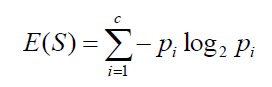

Where:
- \( p_i \): The proportion of instances belonging to class \( i \).
- \( s \): The number of classes.

---


In [5]:
import numpy as np

In [6]:
# Function to calculate entropy
def calculate_entropy(column):
    elements, counts = np.unique(column, return_counts=True)
    entropy = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [7]:
# Function to calculate information gain
def calculate_information_gain(data, feature, target):
    total_entropy = calculate_entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * calculate_entropy(data[data[feature] == values[i]][target]) for i in range(len(values))])
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [8]:
# Calculate information gain for all features
target = 'buys_computer'
features = ['age', 'income', 'student', 'credit_rating']

info_gains = {feature: calculate_information_gain(df, feature, target) for feature in features}
info_gains

{'age': 0.24674981977443933,
 'income': 0.02922256565895487,
 'student': 0.15183550136234159,
 'credit_rating': 0.04812703040826949}

In [9]:
# Convert the dictionary to a DataFrame
info_gains_df = pd.DataFrame(list(info_gains.items()), columns=['feature', 'information_gain'])
info_gains_df

,feature,information_gain
0,age,0.246750
1,income,0.029223
2,student,0.151836
3,credit_rating,0.048127


#### Based on the information gain values, the feature with the *highest information gain is age (0.2467).* This should be chosen as the root node of your decision tree.

## Constructing the Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#### Convert categorical data to numerical if not already done

In [11]:
df_encoded = df.copy()
for col in ['age', 'income', 'student', 'credit_rating', 'buys_computer']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

#### Features and Target

In [12]:
X = df_encoded[['age', 'income', 'student', 'credit_rating']]
y = df_encoded['buys_computer']

#### Train the Decision Tree

In [13]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

#### Visualize the Decision Tree

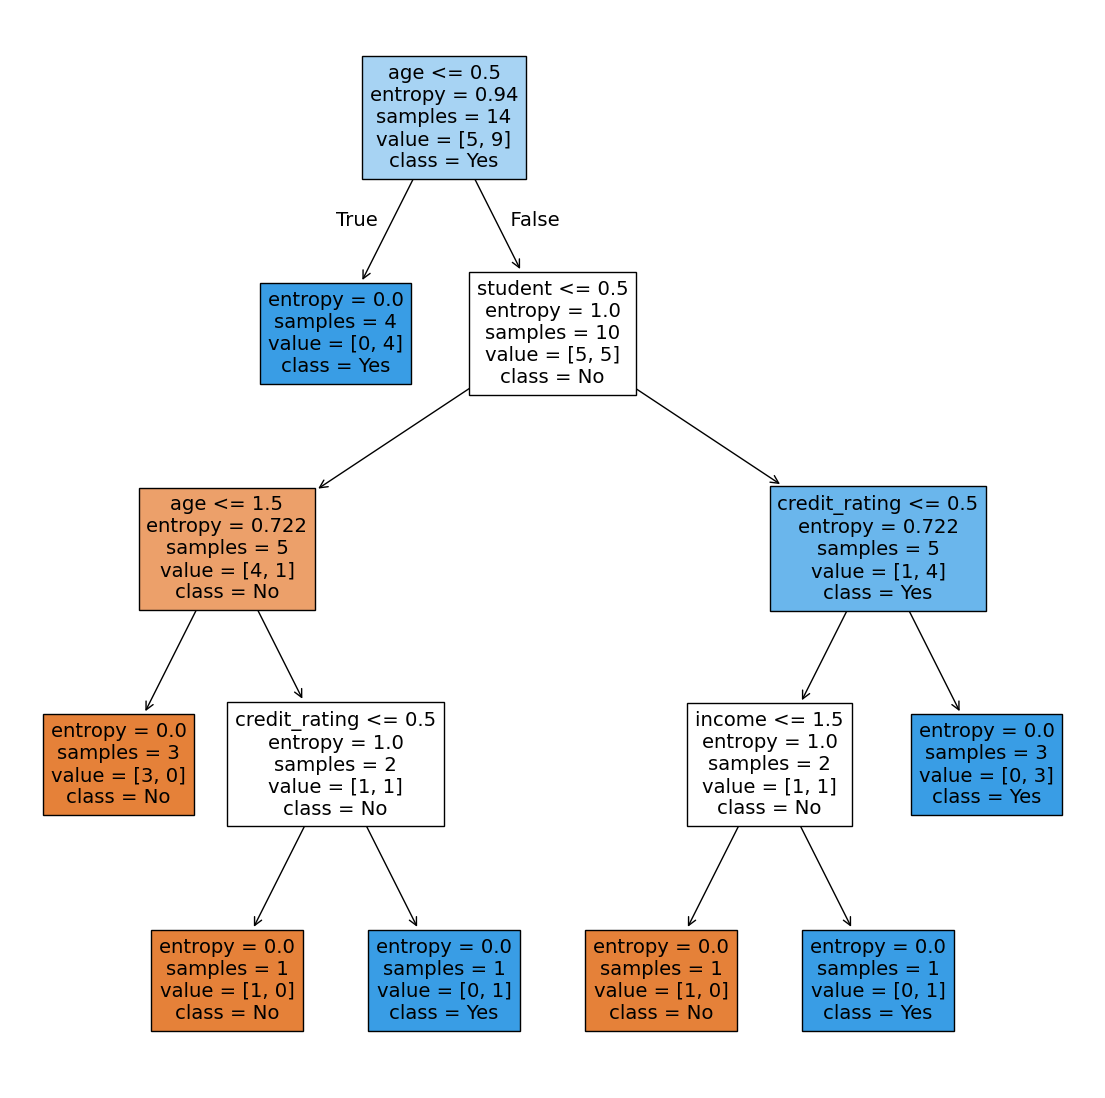

In [14]:
plt.figure(figsize=(14, 14))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['No', 'Yes'], filled=True)
plt.savefig('decision_tree.png', dpi=300)
plt.show()

The `0.5` in the decision tree refers to a **numerical threshold** for the features in the dataset.
---
### 1. **Why Thresholds Exist?**
- Decision tree algorithms like `sklearn.tree.DecisionTreeClassifier` automatically **encode categorical variables** into numeric values for internal calculations.
- For example:
  - `age` might be encoded as:
    - `<=30` → 0
    - `31...40` → 1
    - `>40` → 2
  - A threshold like `0.5` in the condition `age <= 0.5` corresponds to splitting the data where `age` is in the first category (`<=30`).

### 2. **Interpreting the 0.5 Threshold**
- **For `age <= 0.5`**:
  - This means `age` is in the first category (`<=30`).
  - If `age` was encoded as:
    - `<=30` → 0
    - `31...40` → 1
    - `>40` → 2
  - The threshold of `0.5` is used to separate values `0` (True for `<=30`) from the others.

- Similarly, for other features:
  - `student <= 0.5` means "No" (`0`) for student.
  - `credit_rating <= 0.5` means "Fair" (`0`) for credit rating.

### 3. **How to Relate Thresholds to Original Categories**
You can map these numeric thresholds back to the original categories by checking the encoding used. For example:
- `0.5` → Separates `0` (e.g., "No") from `1` (e.g., "Yes").
- A threshold like `1.5` → Separates `1` (e.g., "31...40") from `2` (e.g., `>40`).

### 4. **Why Threshold 0.5?**
The 0.5 threshold specifically arises from:
- **Numeric encoding**: The tree interprets categorical values numerically.
- **Binary splits**: Decision trees create splits by checking conditions like `<=` or `>`.
---

## Extracting Rules from the Tree

In [15]:
from sklearn.tree import export_text

In [16]:
tree_rules = export_text(clf, feature_names=['age', 'income', 'student', 'credit_rating'])
print(tree_rules)

|--- age <= 0.50
|   |--- class: 1
|--- age >  0.50
|   |--- student <= 0.50
|   |   |--- age <= 1.50
|   |   |   |--- class: 0
|   |   |--- age >  1.50
|   |   |   |--- credit_rating <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- credit_rating >  0.50
|   |   |   |   |--- class: 1
|   |--- student >  0.50
|   |   |--- credit_rating <= 0.50
|   |   |   |--- income <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- income >  1.50
|   |   |   |   |--- class: 1
|   |   |--- credit_rating >  0.50
|   |   |   |--- class: 1



## Testing the Decision Tree

In [17]:
testing_df = pd.read_excel('decision_tree_dataset.xlsx', sheet_name='testing_dataset')

In [18]:
testing_df

,age,income,student,credit_rating,buys_computer
0,<=30,medium,no,fair,?
1,31-40,medium,yes,excellent,?
2,>40,low,no,excellent,?
3,<=30,high,yes,fair,?


In [19]:
test_data = testing_df.drop(columns=['buys_computer'])

In [20]:
test_data

,age,income,student,credit_rating
0,<=30,medium,no,fair
1,31-40,medium,yes,excellent
2,>40,low,no,excellent
3,<=30,high,yes,fair


In [ ]:
# Encode the testing data
test_data_encoded = test_data.copy()
for col in ['age', 'income', 'student', 'credit_rating']:
    test_data_encoded[col] = test_data_encoded[col].astype('category').cat.codes

In [ ]:
# Predict using the Decision Tree
predictions = clf.predict(test_data_encoded)
test_data['buys_computer'] = predictions

In [ ]:
# Display the classified testing data
test_data

In [ ]:
# Map 0 to 'no' and 1 to 'yes' in the 'buys_computer' column
test_data['buys_computer'] = test_data['buys_computer'].map({0: 'no', 1: 'yes'})
test_data